# Analysis Queries

A list of queries for analysis of the completed star schema.

In [ ]:
# Install necessary packages
!pip install ipython-sql

In [ ]:
# Load the SQL extension
%load_ext sql

## Query 1

### How many songs does an average user listens per session?

Below query consists of outer query that uses FROM clause to get grouped data from inner query. The inner query counts songs per session for each user, and then the outer query takes an average from the count list. The answer is 15.

In [ ]:
%%sql 
SELECT AVG(counts_per_session) AS avg_count
FROM (
    SELECT session_id,
    count(*) AS counts_per_session
    FROM songplay
    GROUP BY session_id
) AS avg_session_count

## Query 2

### What are the top 5 songs among all users?
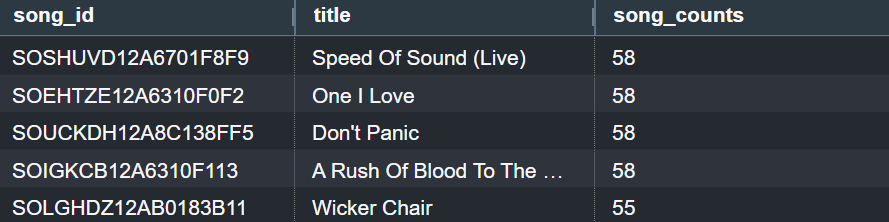

In [ ]:
%%sql
SELECT s.song_id,
s.title,
COUNT(sp.song_id) AS song_counts
FROM song s
JOIN songplays sp
ON s.song_id=sp.song_id
GROUP BY s.song_id, s.title
ORDER BY COUNT(sp.song_id) DESC
LIMIT 5

## Query 3

### What are top 3 artists?
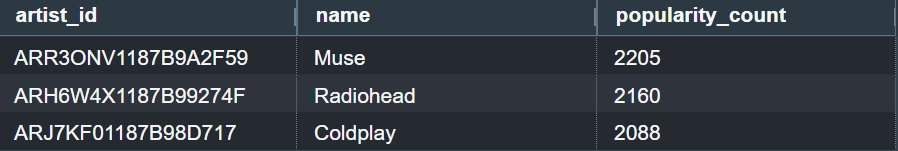

In [ ]:
%%sql
SELECT a.artist_id,
a.name,
COUNT(sp.artist_id) AS popularity_count
FROM artist a
JOIN songplay sp
ON a.artist_id=sp.artist_id
GROUP BY a.artist_id, a.name
ORDER BY COUNT(sp.artist_id) DESC
LIMIT 3

## Query 4

### What is percentage of users that use free level to users who use paid level?